<a href="https://colab.research.google.com/github/Daarwinmendez/VRP-con-ACO-y-Kmeans-Constrained/blob/main/Copia_Definitiva_de_Proyecto_VRP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Librerias a Utilizar

In [ ]:
from google.colab import drive
import os
from io import StringIO
import pandas as pd
from typing import List, Tuple, Dict
import math
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import time
import psutil
import seaborn as sns

## Importacion de los datos

In [ ]:
drive.mount('/content/drive')
my_drive_path = '/content/drive/MyDrive'

vrp = os.path.join(my_drive_path, "Distribuida", "Proyecto VRP")

problem_set_df = pd.read_excel(os.path.join(vrp, "problemset", 'problemset.xlsx'))

def get_parquet(index):
    """
    Recibe un indice y retorna:
      * Nodos: dataframe
      * Capacidad del vehiculo: entero
      * Matriz de distancias: dataframe
    Ej:
    get_parquet(0)
    >>>> (nodes, capacity, distance_matrix)
    """

    os.chdir(os.path.join(my_drive_path, "Distribuida", "Proyecto VRP"))
    print(os.getcwd())

    # Intentar cargar cada archivo en bloques por si hay problemas con la memoria
    nodes_path = problem_set_df.loc[index, 'nodes']
    capacity = problem_set_df.loc[index, 'vehicle_capacity']
    distance_matrix_path = problem_set_df.loc[index, "distance_matrix"]

    # Leer archivo de nodos
    nodes = pd.read_parquet(nodes_path)

    capacity

    # Leer archivo de matriz de distancias
    distance_matrix = pd.read_parquet(distance_matrix_path)

    return nodes, capacity, distance_matrix

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
problem_set_df

,problem_cluster,nodes,distance_matrix,vehicle_capacity,bf best route,bf best value,bf n vehicles,cw best route,cw best value,cw n vehicles,aco best route,aco best value,aco n vehicles
0,small-10n-c50_70-d10_50,problemset/in/small-10n-c50_70-d10_50_nodes.pa...,problemset/in/small-10n-c50_70-d10_50_dm.parquet,50,"[array([1, 2], dtype=int64) array([4, 5], dtyp...",872.082598,6.0,"[array([4, 2], dtype=int64) array([9, 5], dtyp...",922.314680,6,"[array([8, 2], dtype=int64) array([3, 9], dtyp...",1090.129161,6
1,small-10n-c50_70-d10_50,problemset/in/small-10n-c50_70-d10_50_nodes.pa...,problemset/in/small-10n-c50_70-d10_50_dm.parquet,55,"[array([2, 4, 5], dtype=int64) array([6], dtyp...",733.977081,5.0,"[array([5, 4, 2], dtype=int64) array([9, 1], d...",733.977081,5,"[array([8, 2], dtype=int64) array([6], dtype=i...",945.011879,5
2,small-10n-c50_70-d10_50,problemset/in/small-10n-c50_70-d10_50_nodes.pa...,problemset/in/small-10n-c50_70-d10_50_dm.parquet,60,"[array([2, 4, 5], dtype=int64) array([6, 7], d...",651.901348,4.0,"[array([5, 4, 2], dtype=int64) array([9, 1], d...",651.901348,4,"[array([8, 9], dtype=int64) array([6, 7], dtyp...",693.171486,4
3,small-10n-c50_70-d10_50,problemset/in/small-10n-c50_70-d10_50_nodes.pa...,problemset/in/small-10n-c50_70-d10_50_dm.parquet,65,"[array([2, 1, 3], dtype=int64) array([6, 7], d...",637.303323,4.0,"[array([5, 4, 2], dtype=int64) array([9, 1], d...",651.901348,4,"[array([8, 3], dtype=int64) array([6, 7], dtyp...",708.420574,4
4,small-10n-c50_70-d10_50,problemset/in/small-10n-c50_70-d10_50_nodes.pa...,problemset/in/small-10n-c50_70-d10_50_dm.parquet,70,"[array([1, 2, 4], dtype=int64) array([6, 7], d...",623.374290,4.0,"[array([5, 4, 2], dtype=int64) array([9, 1], d...",651.901348,4,"[array([8, 9, 2], dtype=int64) array([7, 5, 4]...",769.112343,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,big-250n-c150_300-d15,problemset/in/big-250n-c150_300-d15_nodes.parquet,problemset/in/big-250n-c150_300-d15_dm.parquet,222,NaN,NaN,NaN,"[array([ 53, 132, 149, 247, 42, 203, 183, 168...",3196.601990,19,"[array([157, 6, 178, 205, 55, 208, 57, 154...",4997.874931,18
74,big-250n-c150_300-d15,problemset/in/big-250n-c150_300-d15_nodes.parquet,problemset/in/big-250n-c150_300-d15_dm.parquet,240,NaN,NaN,NaN,"[array([102, 150, 229, 92, 114, 145, 168, 183...",2892.500183,17,"[array([ 85, 67, 105, 22, 182, 164, 52, 76...",4935.450769,16
75,big-250n-c150_300-d15,problemset/in/big-250n-c150_300-d15_nodes.parquet,problemset/in/big-250n-c150_300-d15_dm.parquet,258,NaN,NaN,NaN,"[array([ 27, 66, 110, 149, 247, 42, 203, 183...",2799.381625,16,"[array([116, 191, 47, 75, 23, 91, 65, 202...",4907.627587,15
76,big-250n-c150_300-d15,problemset/in/big-250n-c150_300-d15_nodes.parquet,problemset/in/big-250n-c150_300-d15_dm.parquet,276,NaN,NaN,NaN,"[array([194, 27, 66, 110, 149, 247, 42, 203...",2702.502351,15,"[array([177, 22, 243, 206, 137, 5, 82, 75...",4789.440067,14


In [ ]:
grafo1, capacity1, distance_matrix1 = get_parquet(0)

/content/drive/MyDrive/Distribuida/Proyecto VRP


In [ ]:
grafo1

,x,y,demand
0,96,10,0
1,12,39,36
2,16,89,10
3,47,12,18
4,27,91,24
5,43,81,20
6,79,63,39
7,99,72,19
8,87,10,40
9,36,45,18


In [ ]:
distance_matrix1

,0,1,2,3,4,5,6,7,8,9
0,0.000000,88.865066,112.432202,49.040799,106.404887,88.600226,55.659680,62.072538,9.000000,69.462220
1,88.865066,0.000000,50.159745,44.204072,54.120237,52.201533,71.168813,93.048375,80.411442,24.738634
2,112.432202,50.159745,0.000000,83.006024,11.180340,28.160256,68.154237,84.723078,106.216760,48.332184
3,49.040799,44.204072,83.006024,0.000000,81.492331,69.115845,60.207973,79.397733,40.049969,34.785054
4,106.404887,54.120237,11.180340,81.492331,0.000000,18.867962,59.059292,74.464757,100.801786,46.872167
5,88.600226,52.201533,28.160256,69.115845,18.867962,0.000000,40.249224,56.718604,83.528438,36.674242
6,55.659680,71.168813,68.154237,60.207973,59.059292,40.249224,0.000000,21.931712,53.600373,46.615448
7,62.072538,93.048375,84.723078,79.397733,74.464757,56.718604,21.931712,0.000000,63.150614,68.541958
8,9.000000,80.411442,106.216760,40.049969,100.801786,83.528438,53.600373,63.150614,0.000000,61.854668
9,69.462220,24.738634,48.332184,34.785054,46.872167,36.674242,46.615448,68.541958,61.854668,0.000000


## Clustering [Darwin]

In [ ]:


class KMeansConstrained:
    """
    Implementa un algoritmo de K-Means con restricción de capacidad.

    Atributos
    ---------
    df_points : pd.DataFrame
        DataFrame que contiene las columnas 'x', & y opcionalmente 'demand'.
        Por defecto, se omite la primera fila del DataFrame original, según lo requerido.
    n_initial_clusters : int
        Número inicial de clusters para K-Means.
    capacity : float
        Capacidad máxima de demanda para cada cluster.
    max_iter : int
        Máximo número de iteraciones para el modelo K-Means.
    kmeans : KMeans
        Instancia del modelo K-Means de scikit-learn, se crea después de llamar a `fit`.

    Métodos
    -------
    fit():
        Ajusta el modelo KMeans con el número inicial de clusters y asigna etiquetas a `df_points`.
    get_clusters():
        Retorna la columna con las etiquetas de cluster asignadas.
    get_centroids():
        Retorna la posición de los centroides de cada cluster.
    get_labels():
        Alias de get_clusters().
    predict():
        Retorna la predicción de clusters para cada punto (solo posible tras `fit`).
    with_constraint():
        Ajusta la asignación de puntos para que cada cluster cumpla con la restricción de capacidad.
        Retorna una lista de (índice, demanda) para los puntos removidos (left_over) y el DataFrame con la asignación.
    pick_left_overs():
        Reagrupa o re-clusteriza los puntos sobrantes (left_over) en nuevos clusters según su demanda total y la capacidad.
    fit_constrained(max_iter_global=10):
        Ajusta el modelo iterativamente, intentando cumplir la restricción de capacidad.
        Si hay sobrantes, se reagrupan en nuevos clusters o se incrementa el número de clusters global.
    """

    def __init__(self, df: pd.DataFrame, n_initial_clusters: int, capacity: float, max_iter: int = 1000):
        """
        Parámetros
        ----------
        df : pd.DataFrame
            DataFrame que contiene como mínimo las columnas 'x' y 'y'.
            Puede contener opcionalmente una columna 'demand'.
            Según lo requerido, se omite la primera fila del DataFrame.
        n_initial_clusters : int
            Número de clusters iniciales a utilizar en KMeans.
        capacity : float
            Capacidad máxima de la demanda para cada cluster.
        max_iter : int, opcional
            Máximo de iteraciones para el algoritmo KMeans (por defecto 1000).
        """
        # Se omite la primera fila, según lo requerido
        self.df_points = df.iloc[1:].copy()

        # Verificar columnas obligatorias
        if not all(col in self.df_points.columns for col in ['x', 'y']):
            raise ValueError("El DataFrame debe contener las columnas 'x' y 'y' al menos.")

        self.n_initial_clusters = n_initial_clusters
        self.capacity = capacity
        self.max_iter = max_iter

        # Extraer la columna 'demand' si existe
        self.demand = self.df_points['demand'] if 'demand' in self.df_points.columns else None

        # El modelo KMeans se inicializará en el método fit
        self.kmeans = None

    def fit(self) -> None:
        """
        Ajusta el modelo KMeans con el número de clusters especificado
        y asigna las etiquetas (clusters) al DataFrame interno.
        """
        self.kmeans = KMeans(
            n_clusters=self.n_initial_clusters,
            max_iter=self.max_iter,
            n_init=10,
            random_state=42  # Puedes fijar un random_state si deseas reproducibilidad
        )
        self.kmeans.fit(self.df_points[['x', 'y']].values)
        self.df_points['cluster'] = pd.Series(self.kmeans.labels_, index=self.df_points.index, dtype="Int64")


    def get_clusters(self) -> pd.Series:
        """
        Retorna la columna con los clusters asignados.

        Returns
        -------
        pd.Series
            Serie con la etiqueta de cluster de cada punto.
        """
        if 'cluster' not in self.df_points.columns:
            raise ValueError("Los clusters aún no han sido asignados. Llama a 'fit' primero.")
        return self.df_points['cluster']

    def get_centroids(self) -> pd.DataFrame:
        """
        Retorna los centroides de cada cluster calculados como la media de x e y.

        Returns
        -------
        pd.DataFrame
            DataFrame con las columnas ['x', 'y'] de los centroides por cluster.
        """
        if 'cluster' not in self.df_points.columns:
            raise ValueError("No se puede calcular centroides sin haber asignado clusters. Llama a 'fit' primero.")
        return self.df_points.groupby('cluster')[['x', 'y']].mean()

    def get_labels(self) -> pd.Series:
        """
        Alias de get_clusters() para compatibilidad.

        Returns
        -------
        pd.Series
            Serie con la etiqueta de cluster de cada punto.
        """
        return self.get_clusters()

    def predict(self) -> pd.Series:
        """
        Retorna la predicción de clusters para cada punto según el modelo KMeans ya entrenado.

        Returns
        -------
        pd.Series
            Predicción de cada punto (etiqueta de cluster).
        """
        if self.kmeans is None:
            raise ValueError("El modelo KMeans no ha sido ajustado. Llama a 'fit' primero.")
        return pd.Series(self.kmeans.predict(self.df_points[['x', 'y']].values), index=self.df_points.index)

    def with_constraint(self):
        """
        Verifica que cada cluster cumpla con la restricción de capacidad.
        Si un cluster excede la capacidad, se remueven puntos iterativamente
        comenzando por aquel de menor demanda, asignándolos como 'None'.

        Returns
        -------
        tuple
            - left_over: list of (index, demand) con los puntos que se removieron.
            - df_clusters: pd.DataFrame con la asignación de clusters luego de la restricción.
        """
        if self.kmeans is None:
            raise ValueError("El modelo KMeans no ha sido ajustado. Llama a 'fit' primero.")
        if self.demand is None:
            raise ValueError("No existe la columna 'demand' en el DataFrame para aplicar la capacidad.")

        # Obtener predicciones y crear un nuevo DataFrame para manipular
        predicted_labels = self.predict()
        df_clusters = self.df_points[['x', 'y']].copy()
        df_clusters['demand'] = self.demand.values
        df_clusters['cluster'] = predicted_labels

        # Calcular la suma de la demanda por cluster
        demand_sum = df_clusters.groupby('cluster')['demand'].sum()
        clusters = demand_sum.index.to_list()
        left_over = []

        # Revisar cada cluster y remover puntos con menor demanda hasta cumplir capacidad
        for c in clusters:
            cluster_subset = df_clusters.loc[df_clusters['cluster'] == c]
            while cluster_subset['demand'].sum() > self.capacity:
                min_idx = cluster_subset['demand'].idxmin()
                min_val = cluster_subset.loc[min_idx, 'demand']
                left_over.append((min_idx, min_val))

                # Asignar None a ese punto y actualizar el subset
                df_clusters.at[min_idx, 'cluster'] = pd.NA
                cluster_subset = df_clusters.loc[df_clusters['cluster'] == c]

        return left_over, df_clusters

    def pick_left_overs(self) -> pd.DataFrame:
        """
        Verifica si los puntos sobrantes (left_over) pueden formar uno o más nuevos clusters.

        - Si la suma de demanda de los sobrantes <= capacidad, se agrupan en un solo cluster nuevo.
        - En caso contrario, se aplica KMeans a los sobrantes para formar la cantidad de clusters
          necesaria (estimada por el cociente total demanda / capacidad).

        Returns
        -------
        pd.DataFrame o None
            DataFrame actualizado con los nuevos clusters para los sobrantes, o None si no hay sobrantes.
        """
        if self.kmeans is None:
            raise ValueError("El modelo KMeans no ha sido ajustado. Llama a 'fit' primero.")
        if self.demand is None:
            raise ValueError("No existe la columna 'demand' en el DataFrame para aplicar la capacidad.")

        left_over, df_clusters = self.with_constraint()
        if not left_over:
            # No hay puntos sobrantes
            return None

        total_leftover_demand = sum(d for _, d in left_over)
        n_clusters_left = math.ceil(total_leftover_demand / self.capacity)

        if n_clusters_left <= 1:
            # Todos los sobrantes pueden ir a un solo cluster nuevo
            max_cluster = df_clusters['cluster'].dropna().max()
            max_cluster = int(max_cluster) if pd.notna(max_cluster) else 0

            # Actualizar en self.df_points
            self.df_points['cluster'] = df_clusters['cluster']
            indices_sobrantes = [idx for idx, _ in left_over]
            self.df_points.loc[indices_sobrantes, 'cluster'] = max_cluster + 1
            return self.df_points
        else:
            # Re-clusterizar los puntos sobrantes en tantos clusters como sea necesario
            indices_sobrantes = [idx for idx, _ in left_over]
            leftovers_df = df_clusters.loc[indices_sobrantes].copy()
            leftovers_df.drop(columns=['cluster'], inplace=True)

            # Ajustar KMeans en los sobrantes
            kmeans_left = KMeans(
                n_clusters=n_clusters_left,
                max_iter=self.max_iter,
                n_init=10,
                random_state=42
            )
            kmeans_left.fit(leftovers_df[['x', 'y']].values)

            # Asignar nuevos clusters y evitar colisiones con los clusters existentes
            leftovers_df['cluster'] = kmeans_left.labels_
            max_cluster = df_clusters['cluster'].dropna().max()
            max_cluster = int(max_cluster) if pd.notna(max_cluster) else 0
            leftovers_df['cluster'] += (max_cluster + 1)

            # Actualizar DataFrame global
            df_clusters.update(leftovers_df)
            self.df_points['cluster'] = df_clusters['cluster']
            return self.df_points

    def fit_constrained(self, max_iter_global: int = 10, max_clusters_allowed: int = None) -> None:
        """
        Ajusta el modelo intentando cumplir la restricción de capacidad,
        empezando con 1 clúster y subiendo hasta n_initial_clusters
        (o un máximo dado).
        """
        if self.demand is None:
            raise ValueError("No existe la columna 'demand' en el DataFrame.")

        # Si no se especifica un máximo de clústeres, por defecto
        # es el número de filas, para evitar el error de scikit-learn.
        if max_clusters_allowed is None:
            max_clusters_allowed = len(self.df_points)

        # Empezamos en 1 clúster
        self.n_initial_clusters = 1

        # Hasta llegar al máximo de iteraciones globales
        for _ in range(max_iter_global):
            # Volvemos a hacer un ciclo interno donde, en caso de no cumplir, incrementamos cluster en 1
            while self.n_initial_clusters <= max_clusters_allowed:
                # Ajustamos con self.n_initial_clusters
                self.fit()

                # Aplicamos la restricción
                left_over, df_clusters = self.with_constraint()

                if not left_over:
                    # Si no hay sobrantes, listo
                    self.df_points['cluster'] = df_clusters['cluster']
                    return
                else:
                    # Si hay sobrantes, vemos si se pueden juntar en 1 nuevo cluster
                    total_demand_leftover = sum(d for _, d in left_over)
                    if total_demand_leftover <= self.capacity:
                        # Si todos caben en un solo cluster nuevo, lo creamos y terminamos
                        max_cluster = df_clusters['cluster'].dropna().max()
                        max_cluster = int(max_cluster) if pd.notna(max_cluster) else 0

                        self.df_points['cluster'] = df_clusters['cluster']
                        indices_sobrantes = [idx for idx, _ in left_over]
                        self.df_points.loc[indices_sobrantes, 'cluster'] = max_cluster + 1
                        return
                    else:
                        # Si tampoco caben en uno solo, re-clusterizamos los sobrantes
                        self.pick_left_overs()
                        # Aumentamos el número de clústeres
                        self.n_initial_clusters += 1

            # Si llegamos aquí, es porque se excedió max_clusters_allowed
            print("Advertencia: No se encontró una solución que cumpla la restricción "
                  f"tras llegar a {max_clusters_allowed} clústeres.")
            return

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

grafo1 = grafo1
capacity = 50

# En este caso, vamos a iniciar con 1 cluster para que el algoritmo encuentre
# iterativamente el número óptimo de clusters que respeta la restricción.
n_initial_clusters = 1

# Instanciamos la clase
prueba_kmeans = KMeansConstrained(df=grafo1,
                                  n_initial_clusters=n_initial_clusters,
                                  capacity=capacity,
                                  max_iter=1000)
# Ajustamos el modelo con restricción de capacidad
prueba_kmeans.fit_constrained()

# Imprimimos la asignación final de clusters
prueba_kmeans.get_clusters()

,cluster
1,1.0
2,5.0
3,2.0
4,0.0
5,0.0
6,3.0
7,5.0
8,4.0
9,5.0


In [ ]:
prueba_kmeans.df_points['demand'].groupby(prueba_kmeans.df_points['cluster']).sum()

,demand
cluster,
0.0,44
1.0,36
2.0,18
3.0,39
4.0,40
5.0,47


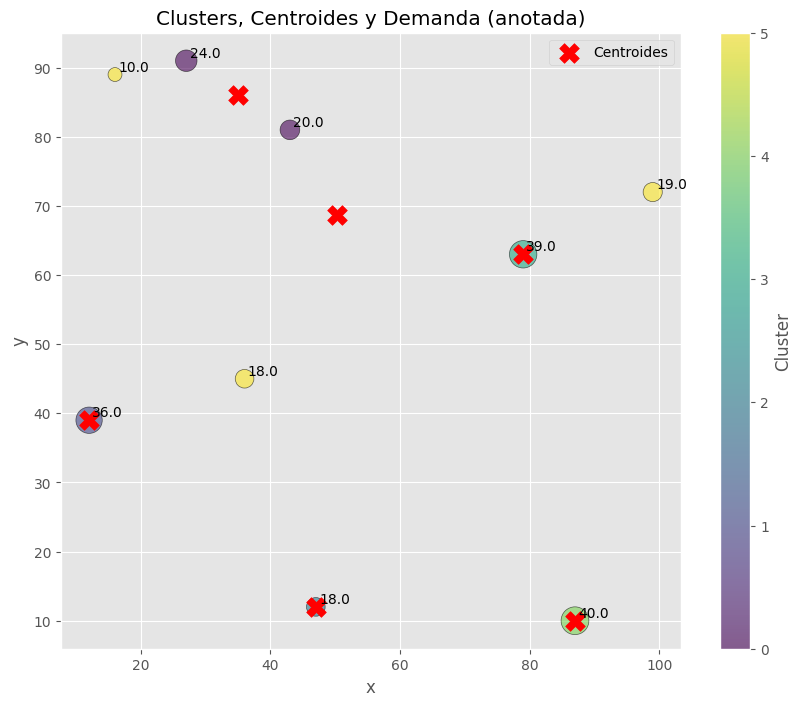

In [ ]:
df_clusters = prueba_kmeans.df_points.copy()

# Obtener los centroides de los clusters
centroids = prueba_kmeans.get_centroids()

plt.figure(figsize=(10, 8))

# Graficar los puntos: se usa 'cluster' para el color y 'demand' para ajustar el tamaño (opcional)
scatter = plt.scatter(df_clusters['x'], df_clusters['y'],
                      c=df_clusters['cluster'],
                      s=df_clusters['demand'] * 10,  # factor para escalar el tamaño
                      cmap='viridis', alpha=0.6, edgecolor='k')

plt.colorbar(scatter, label='Cluster')

# Graficar los centroides
plt.scatter(centroids['x'], centroids['y'], marker='X', color='red', s=200, label='Centroides')

# Anotar la demanda en cada punto
for idx, row in df_clusters.iterrows():
    plt.text(row['x'] + 0.5, row['y'] + 0.5, str(row['demand']),
             fontsize=10, color='black')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Clusters, Centroides y Demanda (anotada)')
plt.legend()
plt.show()


## Planteamiento. - Anyone
Ya que hemos hecho lo siguiente:
* Asignado la matriz de distancia a un par de nodos XY
* Creado los clusters con restricciones
* Ignorado el depot en lo que concierne clusterizar porque es el punto de partida y regreso de cada cluster.

Podemos definitivamente visualizar un grafo de referencia, y luego obtener cada distancia entre cada nodo dentro de cada cluster en el plano.

### Lo que vendría siendo, una matriz de distancia


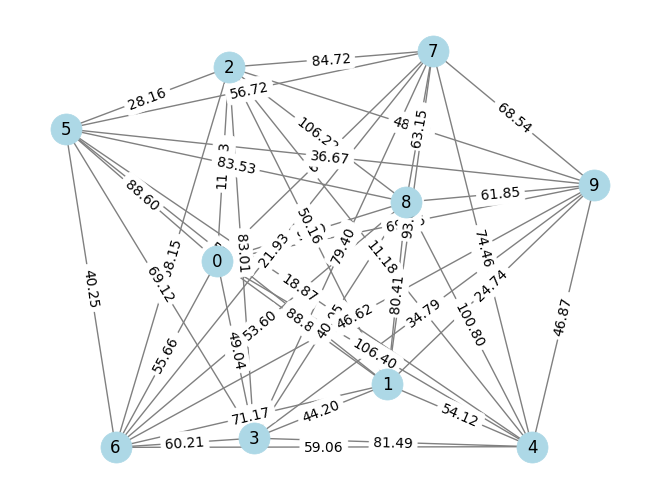

In [ ]:
matrix = distance_matrix1.to_numpy()

G = nx.from_numpy_array(matrix)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500)
labels = nx.get_edge_attributes(G, 'weight')
formated_labels = {k: f"{v:.2f}" for k, v in labels.items()}

nx.draw_networkx_edge_labels(G, pos, edge_labels=formated_labels)

plt.show()

In [ ]:
distance_matrix1

,0,1,2,3,4,5,6,7,8,9
0,0.000000,88.865066,112.432202,49.040799,106.404887,88.600226,55.659680,62.072538,9.000000,69.462220
1,88.865066,0.000000,50.159745,44.204072,54.120237,52.201533,71.168813,93.048375,80.411442,24.738634
2,112.432202,50.159745,0.000000,83.006024,11.180340,28.160256,68.154237,84.723078,106.216760,48.332184
3,49.040799,44.204072,83.006024,0.000000,81.492331,69.115845,60.207973,79.397733,40.049969,34.785054
4,106.404887,54.120237,11.180340,81.492331,0.000000,18.867962,59.059292,74.464757,100.801786,46.872167
5,88.600226,52.201533,28.160256,69.115845,18.867962,0.000000,40.249224,56.718604,83.528438,36.674242
6,55.659680,71.168813,68.154237,60.207973,59.059292,40.249224,0.000000,21.931712,53.600373,46.615448
7,62.072538,93.048375,84.723078,79.397733,74.464757,56.718604,21.931712,0.000000,63.150614,68.541958
8,9.000000,80.411442,106.216760,40.049969,100.801786,83.528438,53.600373,63.150614,0.000000,61.854668
9,69.462220,24.738634,48.332184,34.785054,46.872167,36.674242,46.615448,68.541958,61.854668,0.000000


In [ ]:
#[[0, 1, 0], [0, 7, 2, 9, 0], [0, 3, 0], [0, 5, 4, 0], [0, 6, 0], [0, 8, 0]]

In [ ]:
distance_matrix1.loc[0, 1] + distance_matrix1.loc[1, 0] + distance_matrix1.loc[0,7] + distance_matrix1.loc[7, 2] + distance_matrix1.loc[2, 9] \
+ distance_matrix1.loc[9,0] + distance_matrix1.loc[0, 3] + distance_matrix1.loc[3, 0] + distance_matrix1.loc[0, 5] + distance_matrix1.loc[5, 4] \
+ distance_matrix1.loc[4, 0] + distance_matrix1.loc[0, 6] + distance_matrix1.loc[6, 0] + distance_matrix1.loc[0, 8] + distance_matrix1.loc[8, 0]


883.594187062982

In [ ]:
grafo1

,x,y,demand
0,96,10,0
1,12,39,36
2,16,89,10
3,47,12,18
4,27,91,24
5,43,81,20
6,79,63,39
7,99,72,19
8,87,10,40
9,36,45,18


In [ ]:
19 + 18 + 10

47

In [ ]:
24 + 20

44

## ACO - Michael

In [ ]:
class ACO:
    def __init__(self,
                 epochs: int,
                 k: int,
                 tau: pd.DataFrame,
                 distance_matrix: pd.DataFrame,
                 nodos_clusters: pd.DataFrame,
                 alpha: float,
                 beta: float,
                 Q: float,
                 tasa_evap: float,
                 retornar_al_deposito: bool = True):
        """
        Constructor del ACO.

        Parámetros:
          - epochs: número de iteraciones (int).
          - k: número de hormigas (int).
          - tau: matriz de feromonas (DataFrame) del mismo tamaño que distance_matrix.
          - distance_matrix: matriz de distancias (DataFrame).
          - nodos_clusters: DataFrame con la columna 'cluster' que indica a qué clúster pertenece cada nodo.
                           Se asume que el índice de 'nodos_clusters' coincide con el de 'distance_matrix'.
          - alpha: peso de la feromona en la probabilidad (float).
          - beta: peso de la heurística en la probabilidad (float).
          - Q: constante para el refuerzo de feromonas (float).
          - tasa_evap: tasa de evaporación (float, entre 0 y 1).
          - retornar_al_deposito: si es True, la ruta regresa al nodo 0 al final (muy típico en VRP/TSP).
        """
        self.epochs = epochs
        self.k = k
        self.tau = tau  # Matriz de feromonas global
        self.distance_matrix = distance_matrix
        self.nodos_clusters = nodos_clusters
        self.alpha = alpha
        self.beta = beta
        self.Q = Q
        self.tasa_evap = tasa_evap
        self.retornar_al_deposito = retornar_al_deposito

        # Se definirá en run() según la submatriz del clúster
        self.eta = None

    def descomponer_clusters(self) -> dict:
        """
        Separa la matriz maestra de distancias en submatrices por clúster.
        Retorna:
            submatrices: dict con {cluster_id: submatriz_de_distancias}
        """
        unique_clusters = self.nodos_clusters['cluster'].unique()
        submatrices = {}

        for cluster in unique_clusters:
            # Índices (nodos) que pertenecen a este clúster
            indices_cluster = self.nodos_clusters.loc[self.nodos_clusters['cluster'] == cluster].index.tolist()

            # Aseguramos que el depósito (nodo 0) esté incluido
            if 0 not in indices_cluster:
                indices_cluster.insert(0, 0)

            # Extraemos la submatriz de distancia
            submatrix = self.distance_matrix.loc[indices_cluster, indices_cluster]
            submatrices[cluster] = submatrix

        return submatrices

    def calcular_probabilidad(self, nodo_actual, nodos_no_visitados):
        """
        Calcula la probabilidad de moverse desde 'nodo_actual' hacia
        cada nodo de 'nodos_no_visitados', según:
            P(i->j) = [tau(i,j)^alpha * eta(i,j)^beta].
        """
        # Feromona^alpha
        feromonas = self.tau.loc[nodo_actual, nodos_no_visitados] ** self.alpha
        # Heurística^beta
        heuristica = self.eta.loc[nodo_actual, nodos_no_visitados] ** self.beta

        prob = feromonas * heuristica
        return prob

    def tomar_decision(self, nodo_actual, nodos_no_visitados):
        """
        Selecciona el siguiente nodo (en 'nodos_no_visitados')
        usando la regla de la ruleta según las probabilidades calculadas.
        """
        probabilidades = self.calcular_probabilidad(nodo_actual, nodos_no_visitados)
        suma_prob = probabilidades.sum()

        if suma_prob == 0:
            # Si todas son 0, escogemos aleatoriamente
            return np.random.choice(nodos_no_visitados)

        # Normalizar
        probabilidades /= suma_prob

        # Elección por ruleta
        siguiente_nodo = np.random.choice(nodos_no_visitados, p=probabilidades)
        return siguiente_nodo

    def calcular_costo_ruta(self, ruta, submatrix):
        """
        Calcula el costo total de 'ruta' (la suma de distancias
        entre nodos consecutivos) usando 'submatrix'.
        """
        costo = 0.0
        for i in range(len(ruta) - 1):
            desde = ruta[i]
            hasta = ruta[i + 1]
            costo += submatrix.loc[desde, hasta]
        return costo

    def calcular_aportes(self, rutas, costos, submatrix):
        """
        Calcula la matriz de refuerzo de feromonas (delta_tau)
        en base a las rutas y sus costos.

        delta_tau(i,j) += Q / costo_ruta si la hormiga usó (i->j).
        """
        nodos = submatrix.index
        # Iniciamos delta_tau en 0
        delta_tau = pd.DataFrame(0.0, index=nodos, columns=nodos)

        for ruta, costo in zip(rutas, costos):
            if costo <= 1e-12:
                # Evitar división por cero
                continue
            contrib = self.Q / costo

            # Para cada par consecutivo de nodos (incluyendo si regresamos al depósito)
            for i in range(len(ruta) - 1):
                n_i = ruta[i]
                n_j = ruta[i + 1]
                # Suma en la arista i->j (y j->i si el grafo es bidireccional)
                delta_tau.loc[n_i, n_j] += contrib
                delta_tau.loc[n_j, n_i] += contrib

        return delta_tau

    def run(self):
        """
        Ejecuta el ACO en cada clúster por separado.

        - Para cada clúster, se obtendrá la submatriz correspondiente.
        - Se define eta = 1/distancia para ese clúster.
        - Se realizan 'epochs' iteraciones:
             * Cada hormiga construye su ruta visitando todos los nodos del clúster.
               (Si retornar_al_deposito=True, la hormiga regresa al nodo 0 al final).
             * Se calcula el costo de cada ruta.
             * Se obtiene delta_tau con los aportes de las hormigas.
             * Se actualiza la parte de self.tau correspondiente al clúster.

        Retorna:
            soluciones_por_cluster: dict con {cluster_id: {'mejor_ruta': ...,
                                                           'mejor_costo': ...,
                                                           'historial': [...]}}
            donde 'historial' es una lista de tuplas (epoch, rutas, costos).
        """
        submatrices = self.descomponer_clusters()
        soluciones_por_cluster = {}  # Para guardar la mejor ruta/costo y el historial de soluciones de cada clúster

        for cluster_id, submatrix in submatrices.items():
            print(f"\nResolviendo el problema en el clúster {cluster_id} ...")

            # Definimos la heurística eta = 1 / dist (con un reemplazo de ceros para evitar div/0)
            dist_segura = submatrix.replace(0, 1e-12)
            self.eta = 1 / dist_segura

            # Mejor solución hallada (ruta, costo)
            mejor_ruta = None
            mejor_costo = float('inf')

            # Lista para almacenar el historial de rutas y costos en cada época
            historial = []

            # Inicia el ciclo de iteraciones (epochs)
            for epoch in range(self.epochs):
                rutas = []
                costos = []

                # Construcción de rutas para k hormigas
                for ant_idx in range(self.k):
                    # Lista de nodos por visitar
                    nodos_no_visitados = list(submatrix.index)

                    # Empezamos en el depósito (nodo 0)
                    nodo_actual = 0
                    ruta = [nodo_actual]
                    nodos_no_visitados.remove(nodo_actual)  # No lo volvemos a visitar

                    # Visitamos hasta que no queden nodos
                    while len(nodos_no_visitados) > 0:
                        siguiente_nodo = self.tomar_decision(nodo_actual, nodos_no_visitados)
                        ruta.append(siguiente_nodo)
                        nodos_no_visitados.remove(siguiente_nodo)
                        nodo_actual = siguiente_nodo

                    # Si se requiere, volvemos al depósito
                    if self.retornar_al_deposito and ruta[-1] != 0:
                        ruta.append(0)

                    # Calculamos el costo de la ruta
                    cost = self.calcular_costo_ruta(ruta, submatrix)

                    rutas.append(ruta)
                    costos.append(cost)

                    # Actualizamos la mejor solución si corresponde
                    if cost < mejor_costo:
                        mejor_costo = cost
                        mejor_ruta = ruta

                # Guardamos en el historial lo obtenido en esta época
                historial.append((epoch, rutas.copy(), costos.copy()))

                # Calculamos la contribución de feromonas (delta_tau)
                delta_tau = self.calcular_aportes(rutas, costos, submatrix)

                # Actualizamos solo la porción de self.tau correspondiente a este clúster.
                subTau = self.tau.loc[submatrix.index, submatrix.index]
                # Evaporación
                subTau *= (1 - self.tasa_evap)
                # Refuerzo
                subTau += delta_tau
                # Volcamos de vuelta a la matriz global de feromonas
                self.tau.loc[submatrix.index, submatrix.index] = subTau

            # Guardamos los resultados de este clúster
            soluciones_por_cluster[cluster_id] = {
                'mejor_ruta': mejor_ruta,
                'mejor_costo': mejor_costo,
                'historial': historial
            }
            print(f"Clúster {cluster_id} terminado. Mejor costo = {mejor_costo}")

        return soluciones_por_cluster

## Pruebas Aleatorias - Camily


In [ ]:

distance_matrix1

,0,1,2,3,4,5,6,7,8,9
0,0.000000,88.865066,112.432202,49.040799,106.404887,88.600226,55.659680,62.072538,9.000000,69.462220
1,88.865066,0.000000,50.159745,44.204072,54.120237,52.201533,71.168813,93.048375,80.411442,24.738634
2,112.432202,50.159745,0.000000,83.006024,11.180340,28.160256,68.154237,84.723078,106.216760,48.332184
3,49.040799,44.204072,83.006024,0.000000,81.492331,69.115845,60.207973,79.397733,40.049969,34.785054
4,106.404887,54.120237,11.180340,81.492331,0.000000,18.867962,59.059292,74.464757,100.801786,46.872167
5,88.600226,52.201533,28.160256,69.115845,18.867962,0.000000,40.249224,56.718604,83.528438,36.674242
6,55.659680,71.168813,68.154237,60.207973,59.059292,40.249224,0.000000,21.931712,53.600373,46.615448
7,62.072538,93.048375,84.723078,79.397733,74.464757,56.718604,21.931712,0.000000,63.150614,68.541958
8,9.000000,80.411442,106.216760,40.049969,100.801786,83.528438,53.600373,63.150614,0.000000,61.854668
9,69.462220,24.738634,48.332184,34.785054,46.872167,36.674242,46.615448,68.541958,61.854668,0.000000


In [ ]:
# 1. Ejecutar KMeansConstrained para obtener el DataFrame con clústeres
# (suponiendo que ya tienes grafo1 y has instanciado y corrido el clustering)
prueba_kmeans.fit_constrained()
df_nodos = prueba_kmeans.df_points  # Este DataFrame contiene la columna 'cluster'

# Ahora instanciamos ACO
# (En este ejemplo, tau se inicializará como una matriz global, pero se actualizará en run()
#  utilizando descomponer_clusters() para trabajar en cada clúster)
tau_inicial_global = pd.DataFrame(1, index=distance_matrix1.index, columns=distance_matrix1.columns)

aco_instance = ACO(
    epochs=4,
    k=10,
    tau=tau_inicial_global,
    distance_matrix=distance_matrix1,
    nodos_clusters=df_nodos,  # Usamos el DataFrame con la columna 'cluster'
    alpha=1.0,
    beta=2.0,
    Q=100,
    tasa_evap=0.1,
    retornar_al_deposito=True
)


# primero obtén las submatrices usando ACO.descomponer_clusters()
submatrices = aco_instance.descomponer_clusters()
tau_inicial_dict = {}
for cluster_id, submatrix in submatrices.items():
    tau_inicial_dict[cluster_id] = pd.DataFrame(1, index=submatrix.index, columns=submatrix.columns)


#Ejecuta el ACO
mejores_soluciones = aco_instance.run()
mejores_soluciones


Resolviendo el problema en el clúster 1.0 ...
Clúster 1.0 terminado. Mejor costo = 177.73013250431114

Resolviendo el problema en el clúster 5.0 ...
Clúster 5.0 terminado. Mejor costo = 264.59002037288184

Resolviendo el problema en el clúster 2.0 ...
Clúster 2.0 terminado. Mejor costo = 98.08159868191383

Resolviendo el problema en el clúster 0.0 ...
Clúster 0.0 terminado. Mejor costo = 213.87307510326914

Resolviendo el problema en el clúster 3.0 ...
Clúster 3.0 terminado. Mejor costo = 111.31936040060597

Resolviendo el problema en el clúster 4.0 ...
Clúster 4.0 terminado. Mejor costo = 18.0


{1.0: {'mejor_ruta': [0, 1, 0],
  'mejor_costo': 177.73013250431114,
  'historial': [(0,
    [[0, 1, 0],
     [0, 1, 0],
     [0, 1, 0],
     [0, 1, 0],
     [0, 1, 0],
     [0, 1, 0],
     [0, 1, 0],
     [0, 1, 0],
     [0, 1, 0],
     [0, 1, 0]],
    [177.73013250431114,
     177.73013250431114,
     177.73013250431114,
     177.73013250431114,
     177.73013250431114,
     177.73013250431114,
     177.73013250431114,
     177.73013250431114,
     177.73013250431114,
     177.73013250431114]),
   (1,
    [[0, 1, 0],
     [0, 1, 0],
     [0, 1, 0],
     [0, 1, 0],
     [0, 1, 0],
     [0, 1, 0],
     [0, 1, 0],
     [0, 1, 0],
     [0, 1, 0],
     [0, 1, 0]],
    [177.73013250431114,
     177.73013250431114,
     177.73013250431114,
     177.73013250431114,
     177.73013250431114,
     177.73013250431114,
     177.73013250431114,
     177.73013250431114,
     177.73013250431114,
     177.73013250431114]),
   (2,
    [[0, 1, 0],
     [0, 1, 0],
     [0, 1, 0],
     [0, 1, 0],
     [0

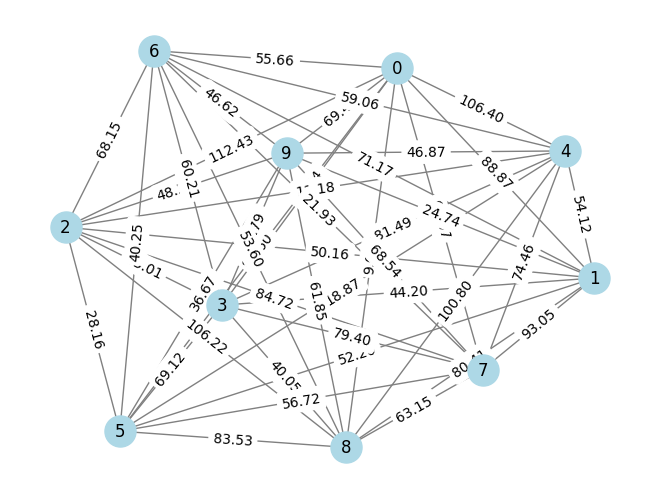

In [ ]:
matrix = distance_matrix1.to_numpy()

G = nx.from_numpy_array(matrix)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500)
labels = nx.get_edge_attributes(G, 'weight')
formated_labels = {k: f"{v:.2f}" for k, v in labels.items()}

nx.draw_networkx_edge_labels(G, pos, edge_labels=formated_labels)

plt.show()

In [ ]:
distance_matrix1

,0,1,2,3,4,5,6,7,8,9
0,0.000000,88.865066,112.432202,49.040799,106.404887,88.600226,55.659680,62.072538,9.000000,69.462220
1,88.865066,0.000000,50.159745,44.204072,54.120237,52.201533,71.168813,93.048375,80.411442,24.738634
2,112.432202,50.159745,0.000000,83.006024,11.180340,28.160256,68.154237,84.723078,106.216760,48.332184
3,49.040799,44.204072,83.006024,0.000000,81.492331,69.115845,60.207973,79.397733,40.049969,34.785054
4,106.404887,54.120237,11.180340,81.492331,0.000000,18.867962,59.059292,74.464757,100.801786,46.872167
5,88.600226,52.201533,28.160256,69.115845,18.867962,0.000000,40.249224,56.718604,83.528438,36.674242
6,55.659680,71.168813,68.154237,60.207973,59.059292,40.249224,0.000000,21.931712,53.600373,46.615448
7,62.072538,93.048375,84.723078,79.397733,74.464757,56.718604,21.931712,0.000000,63.150614,68.541958
8,9.000000,80.411442,106.216760,40.049969,100.801786,83.528438,53.600373,63.150614,0.000000,61.854668
9,69.462220,24.738634,48.332184,34.785054,46.872167,36.674242,46.615448,68.541958,61.854668,0.000000


In [ ]:
9.000000+9.000000

18.0

## Flujo General - Roither


In [ ]:
benchmark = {}

for idx, row in problem_set_df.iterrows():
    grafo_actual, _, matriz_distancia_actual = get_parquet(index=idx)
    capacidad_actual = row['vehicle_capacity']

    clusterizacion = KMeansConstrained(
        df=grafo_actual,
        n_initial_clusters=3,
        capacity=capacidad_actual
    )
    clusterizacion.fit_constrained()

    df_nodos = clusterizacion.df_points

    tau_inicial_global = pd.DataFrame(1, index=matriz_distancia_actual.index, columns=matriz_distancia_actual.columns)

    aco_instance = ACO(
        epochs=5,
        k=10,
        tau=tau_inicial_global,
        distance_matrix=matriz_distancia_actual,
        nodos_clusters=df_nodos,
        alpha=1.0,
        beta=2.0,
        Q=100,
        tasa_evap=0.1,
        retornar_al_deposito=True
    )



    # Medir memoria y tiempo antes de ejecutar ACO
    proceso = psutil.Process()
    memoria_inicial = proceso.memory_info().rss / (1024 ** 2)
    tiempo_inicial = time.perf_counter()

    # Ejecutar ACO
    mejores_soluciones = aco_instance.run()

    # Medir memoria y tiempo después de ejecutar ACO
    tiempo_final = time.perf_counter()
    memoria_final = proceso.memory_info().rss / (1024 ** 2)

    # Calcular tiempo de ejecución y la memoria usada una vez tengamos variables de inicio y final
    tiempo_ejecucion = tiempo_final - tiempo_inicial
    memoria_usada = memoria_final - memoria_inicial



    print("Memoria Usada {}".format(memoria_usada))
    print("Tiempo de ejecución: {} segundos\n\n\n".format(tiempo_ejecucion))



    total_costos = []
    rutas_recorridas = []
    for cluster_id, solucion in mejores_soluciones.items():
        total_costos.append(solucion['mejor_costo'])
        rutas_recorridas.append(solucion['mejor_ruta'])

    benchmark[idx] = {
        'grafo': df_nodos,
        'distance_matrix': row['distance_matrix'],
        'capacidad': capacidad_actual,
        'ACO best routes': rutas_recorridas,
        'ACO n vehicles': len(rutas_recorridas),
        'ACO best value': sum(total_costos),
        'Tiempo ACO': tiempo_ejecucion,
        'Memoria ACO (MB)': memoria_usada
    }


benchmark_df = pd.DataFrame.from_dict(benchmark, orient='index')

Streaming output truncated to the last 5000 lines.

Resolviendo el problema en el clúster 150.0 ...
Clúster 150.0 terminado. Mejor costo = 135.20355024924456

Resolviendo el problema en el clúster 76.0 ...
Clúster 76.0 terminado. Mejor costo = 142.6704345892611

Resolviendo el problema en el clúster 171.0 ...
Clúster 171.0 terminado. Mejor costo = 146.0

Resolviendo el problema en el clúster 86.0 ...
Clúster 86.0 terminado. Mejor costo = 141.6756859873987

Resolviendo el problema en el clúster 125.0 ...
Clúster 125.0 terminado. Mejor costo = 109.5627673984187

Resolviendo el problema en el clúster 180.0 ...
Clúster 180.0 terminado. Mejor costo = 96.02083107326243

Resolviendo el problema en el clúster 113.0 ...
Clúster 113.0 terminado. Mejor costo = 27.784887978899608

Resolviendo el problema en el clúster 29.0 ...
Clúster 29.0 terminado. Mejor costo = 162.80049139974977

Resolviendo el problema en el clúster 45.0 ...
Clúster 45.0 terminado. Mejor costo = 100.65783625729296

Resolviend

In [ ]:
benchmark_df

,grafo,distance_matrix,capacidad,ACO best routes,ACO n vehicles,ACO best value,Tiempo ACO,Memoria ACO (MB)
0,x y demand cluster 1 12 39 36 ...,problemset/in/small-10n-c50_70-d10_50_dm.parquet,50,"[[0, 1, 0], [0, 7, 2, 9, 0], [0, 3, 0], [0, 5,...",6,883.594187,0.849696,0.257812
1,x y demand cluster 1 12 39 36 ...,problemset/in/small-10n-c50_70-d10_50_dm.parquet,55,"[[0, 1, 9, 0], [0, 2, 4, 5, 0], [0, 7, 3, 0], ...",5,733.977081,0.854104,0.000000
2,x y demand cluster 1 12 39 36 ...,problemset/in/small-10n-c50_70-d10_50_dm.parquet,60,"[[0, 9, 1, 0], [0, 5, 4, 2, 0], [0, 8, 3, 0], ...",4,651.901348,0.803658,0.000000
3,x y demand cluster 1 12 39 36 ...,problemset/in/small-10n-c50_70-d10_50_dm.parquet,65,"[[0, 1, 9, 0], [0, 2, 4, 5, 0], [0, 8, 3, 0], ...",4,651.901348,0.807551,0.000000
4,x y demand cluster 1 12 39 36 ...,problemset/in/small-10n-c50_70-d10_50_dm.parquet,70,"[[0, 1, 9, 0], [0, 2, 4, 5, 0], [0, 8, 3, 0], ...",4,651.901348,0.963808,0.000000
...,...,...,...,...,...,...,...,...
73,x y demand cluster 1 29 47 ...,problemset/in/big-250n-c150_300-d15_dm.parquet,222,"[[0, 21, 16, 35, 68, 15, 64, 54, 49, 8, 30, 1,...",20,3501.275441,25.638282,-0.480469
74,x y demand cluster 1 29 47 ...,problemset/in/big-250n-c150_300-d15_dm.parquet,240,"[[0, 161, 44, 153, 246, 134, 131, 172, 30, 248...",18,3495.416492,26.102731,-0.480469
75,x y demand cluster 1 29 47 ...,problemset/in/big-250n-c150_300-d15_dm.parquet,258,"[[0, 236, 153, 246, 134, 1, 192, 131, 30, 172,...",18,3518.924040,26.134681,-0.480469
76,x y demand cluster 1 29 47 ...,problemset/in/big-250n-c150_300-d15_dm.parquet,276,"[[0, 16, 56, 55, 46, 35, 5, 4, 12, 44, 1, 30, ...",15,3196.711440,26.088964,-0.480469


In [ ]:
os.getcwd()

'/content/drive/MyDrive/Distribuida/Proyecto VRP'

In [ ]:
benchmark_df.to_excel('benchmark_aco.xlsx')

# Validación - Darwin

Sea $O_i$ el valor observado y $P_i$ el valor predicho para $i=1,\dots,n$.

**Error puntual:**

$$
E_i = O_i - P_i
$$

**Error Absoluto:**

$$
AE_i = \left| O_i - P_i \right|
$$

**Error Negativo Promedio:**

Sea
$$
I = \{ i \mid O_i - P_i < 0 \},
$$
entonces:
$$
\text{Error Negativo Promedio} = \frac{1}{\lvert I \rvert} \sum_{i \in I} \left( O_i - P_i \right)
$$

**Error Absoluto Promedio (MAE):**

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| O_i - P_i \right|
$$

**Error Cuadrado Promedio (MSE):**

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} \left( O_i - P_i \right)^2
$$


In [ ]:
benchmark_df = pd.read_excel(os.path.join(my_drive_path, 'Distribuida', 'Proyecto VRP', 'benchmark_aco.xlsx'), index_col=0)
problem_set_df['aco best value'].head()

,aco best value
0,1090.129161
1,945.011879
2,693.171486
3,708.420574
4,769.112343


In [ ]:
benchmark_df['ACO best value'].head()

,ACO best value
0,883.594187
1,733.977081
2,651.901348
3,651.901348
4,651.901348


In [ ]:
benchmark_df['Ogando_CW'] = problem_set_df['cw best value']
benchmark_df['Ogando ACO'] = problem_set_df['aco best value']
benchmark_df['Ogando BF'] = problem_set_df['bf best value']

In [ ]:
benchmark_df['Error'] = benchmark_df['Ogando ACO'] - benchmark_df['ACO best value']
benchmark_df['Error Absoluto'] = abs(benchmark_df['Error'])
benchmark_df['Error Relativo'] = benchmark_df['Error Absoluto'] / benchmark_df['Ogando ACO']
MAE = benchmark_df['Error Absoluto'].mean()
MSE = (benchmark_df['Error'] ** 2).mean()

In [ ]:
benchmark_df

,grafo,distance_matrix,capacidad,ACO best routes,ACO n vehicles,ACO best value,Tiempo ACO,Memoria ACO (MB),Ogando_CW,Ogando ACO,Ogando BF,Error,Error Absoluto,Error Relativo
0,x y demand cluster\n1 12 39 36 ...,problemset/in/small-10n-c50_70-d10_50_dm.parquet,50,"[[0, 1, 0], [0, 7, 2, 9, 0], [0, 3, 0], [0, 5,...",6,883.594187,0.849696,0.257812,922.314680,1090.129161,872.082598,206.534974,206.534974,0.189459
1,x y demand cluster\n1 12 39 36 ...,problemset/in/small-10n-c50_70-d10_50_dm.parquet,55,"[[0, 1, 9, 0], [0, 2, 4, 5, 0], [0, 7, 3, 0], ...",5,733.977081,0.854104,0.000000,733.977081,945.011879,733.977081,211.034799,211.034799,0.223314
2,x y demand cluster\n1 12 39 36 ...,problemset/in/small-10n-c50_70-d10_50_dm.parquet,60,"[[0, 9, 1, 0], [0, 5, 4, 2, 0], [0, 8, 3, 0], ...",4,651.901348,0.803658,0.000000,651.901348,693.171486,651.901348,41.270138,41.270138,0.059538
3,x y demand cluster\n1 12 39 36 ...,problemset/in/small-10n-c50_70-d10_50_dm.parquet,65,"[[0, 1, 9, 0], [0, 2, 4, 5, 0], [0, 8, 3, 0], ...",4,651.901348,0.807551,0.000000,651.901348,708.420574,637.303323,56.519226,56.519226,0.079782
4,x y demand cluster\n1 12 39 36 ...,problemset/in/small-10n-c50_70-d10_50_dm.parquet,70,"[[0, 1, 9, 0], [0, 2, 4, 5, 0], [0, 8, 3, 0], ...",4,651.901348,0.963808,0.000000,651.901348,769.112343,623.374290,117.210995,117.210995,0.152398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,x y demand cluster\n1 29 47 ...,problemset/in/big-250n-c150_300-d15_dm.parquet,222,"[[0, 21, 16, 35, 68, 15, 64, 54, 49, 8, 30, 1,...",20,3501.275441,25.638282,-0.480469,3196.601990,4997.874931,NaN,1496.599490,1496.599490,0.299447
74,x y demand cluster\n1 29 47 ...,problemset/in/big-250n-c150_300-d15_dm.parquet,240,"[[0, 161, 44, 153, 246, 134, 131, 172, 30, 248...",18,3495.416492,26.102731,-0.480469,2892.500183,4935.450769,NaN,1440.034277,1440.034277,0.291774
75,x y demand cluster\n1 29 47 ...,problemset/in/big-250n-c150_300-d15_dm.parquet,258,"[[0, 236, 153, 246, 134, 1, 192, 131, 30, 172,...",18,3518.924040,26.134681,-0.480469,2799.381625,4907.627587,NaN,1388.703547,1388.703547,0.282968
76,x y demand cluster\n1 29 47 ...,problemset/in/big-250n-c150_300-d15_dm.parquet,276,"[[0, 16, 56, 55, 46, 35, 5, 4, 12, 44, 1, 30, ...",15,3196.711440,26.088964,-0.480469,2702.502351,4789.440067,NaN,1592.728627,1592.728627,0.332550


In [ ]:
os.getcwd()

'/content/drive/MyDrive/Distribuida/Proyecto VRP'

In [ ]:
benchmark_df.to_excel('benchmark_aco_v1.xlsx')

In [ ]:
MAE

1013.2695949692096

In [ ]:
MSE

3938825.461445243

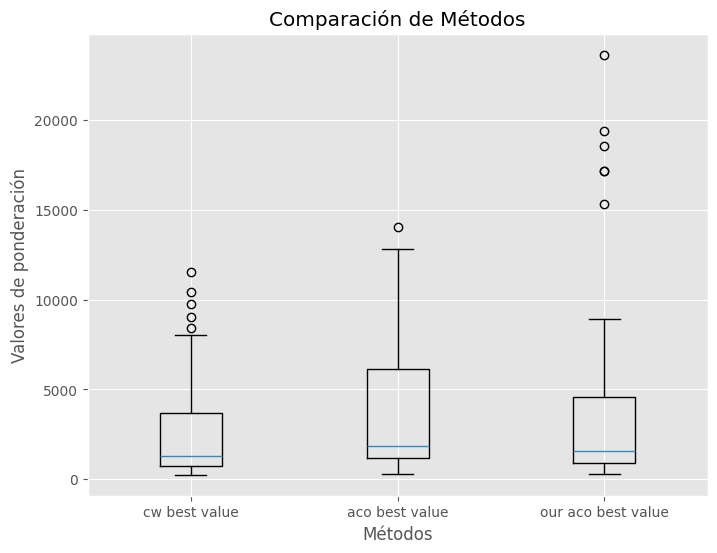

In [ ]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 6))

columnas_a_comparar = problem_set_df[['cw best value', 'aco best value']].copy()
columnas_a_comparar.loc[:, 'our aco best value'] = benchmark_df['ACO best value']


ax.boxplot(columnas_a_comparar.values)


ax.set(
    title='Comparación de Métodos',
    xlabel='Métodos',
    ylabel='Valores de ponderación',
)

ax.set_xticklabels(columnas_a_comparar.columns)
plt.show()

## **Breve Conclusión**

- **MAE (Error Absoluto Medio):** ~1013.92  
  Esto indica que, en promedio, la diferencia absoluta entre los valores reales y los predichos es de aproximadamente **1013.92 unidades**.

- **MSE (Error Cuadrático Medio):** **3,938,187.42**  
  El elevado valor del **MSE** sugiere la presencia de **errores extremos (outliers)**, ya que al elevar al cuadrado estas desviaciones, su impacto en la métrica se amplifica significativamente.

---

A partir del **boxplot**, pudimos observar que algunas **estimaciones** presentan valores significativamente más altos en comparación con el resto, lo que influye directamente en el **MSE**. La presencia de estos valores extremos indica que, en ciertas instancias, el modelo genera predicciones con mayor dispersión, lo que incrementa la variabilidad en los resultados.  

Dado que el **MSE es muy sensible a valores atípicos**, su magnitud se ve afectada por estas estimaciones elevadas. En estos casos, el **MAE** puede ser una métrica más representativa, ya que no penaliza en exceso los valores extremos y proporciona una visión más equilibrada del error promedio.  

En general, los resultados muestran que el algoritmo **ha logrado obtener soluciones viables**, pero podría **afinarse un poco más** para mejorar su estabilidad y alcanzar estimaciones más óptimas.  


\\

## **Participantes en el Proyecto**
1. Darwin Mendez (Yo):
  * GitHub:  https://github.com/Daarwinmendez
  * LinkedIn: www.linkedin.com/in/darwin-mendez-061881185

2. Roither Sanchez
  * GitHub: https://github.com/XTrollaX
  * LinkedIn: https://www.linkedin.com/in/roither-sànchez-sosa-b77b37244/

3. Michael García
  * https://github.com/MichaGF0305
  * LinkedIn: https://www.linkedin.com/in/michael-david-garc%C3%ADa-feliz-37446b296/

4. Camily García
  * GitHub: https://github.com/CamyG18
  * LinkedIn: https://www.linkedin.com/in/camily-garcía-7b4632319/
